In [91]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# URL for JSON: https://unite-db.com/stats.json
# Convert to CSV: df.to_csv("uniteAggregate.csv", encoding='utf-8', index=False)

# Prepare figure sizes
plt.rcParams["figure.figsize"] = (20,3)

# Load data using Python JSON module
with open('uniteJSONs/pokemon.json','r') as f:
    data = json.loads(f.read())

# Normalizing data
df = pd.json_normalize(data, record_path=["level"], meta=["name"])

# Create level column
df.insert(loc=0, column="lvl",
    value=np.tile([i for i in range(1,16)], 22))

# Convert sp_attack column to be of numeric type
df["sp_attack"] = pd.to_numeric(df["sp_attack"])

# Add a BST column (sum of all stats)
# Note: feel free to remove HP since it can drown out other stats
df["bst"] = df["hp"] + df["attack"] + df["defense"] + df["sp_attack"] + df["sp_defense"]

print("Aggregate data")
print(df.head())

# Group data by level
grouped = df.groupby(["lvl"])

# Show all level 1 stats for each pokemon
print("Grouped data")
print(grouped.get_group(15))

Aggregate data
   lvl    hp  attack  defense  sp_attack  sp_defense   name   bst
0    1  3000     170       52         20          36  Absol  3278
1    2  3107     186       59         23          41  Absol  3416
2    3  3224     204       67         27          47  Absol  3569
3    4  3353     223       76         31          53  Absol  3736
4    5  3495     244       86         36          60  Absol  3921
Grouped data
     lvl     hp  attack  defense  sp_attack  sp_defense        name    bst
14    15   6000     620      259        118         180       Absol   7177
29    15  10000     341      200        600         149     Blissey  11290
44    15   7700     463      350        114         269   Charizard   8896
59    15   5400     418      250        119         149   Cinderace   6336
74    15   6301     286      300        739         200   Cramorant   7826
89    15   9900     344      580        116         400     Crustle  11340
104   15   8002     310      200        670        

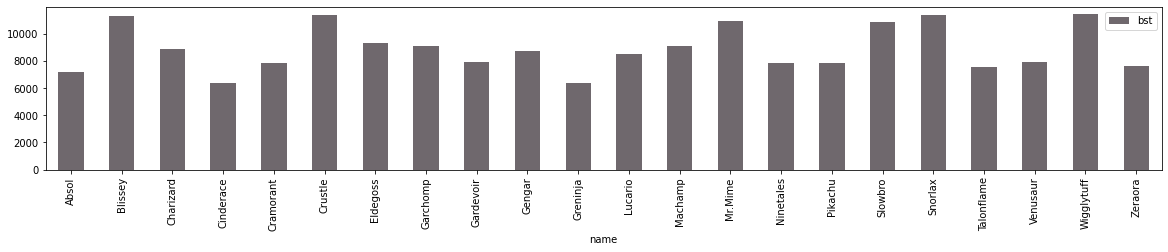

In [92]:
# Graph data for specfic level/stat
level = 15
stat = "bst"

ax = grouped.get_group(level).plot.bar(x="name", y=stat, 
  rot=0, color=["#6F686D"])

ax.tick_params(labelrotation=90)
ax.tick_params(axis="y", labelrotation=0)

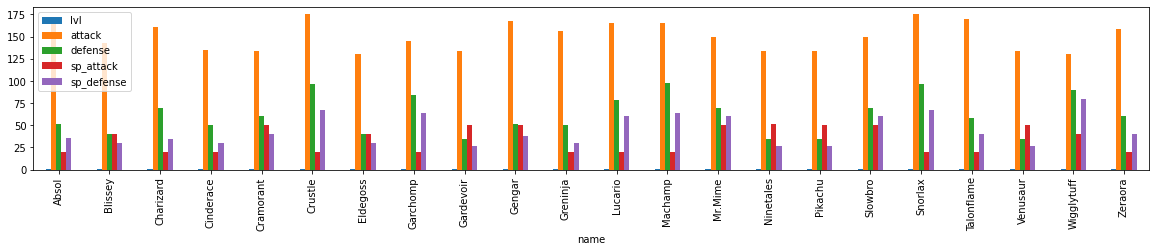

In [93]:
# remove hp/
df.pop("bst")
df.pop("hp")

grouped.get_group(1).plot.bar(x="name")